# Types of Exceptions
---

Java 中所有异常都继承自Throwable，一般简单将异常分为：

- **checked exception**: 调用方必须显性处理的异常，否则编译不通过。
- **unchecked exception**: 编译期间是无法提前检测的异常，又细分为
    - RuntimeException: 例如臭名昭著的 NPE
    - Error: JVM 抛出异常，例如 OutOfMemoryError 等
    
> A **checked exception** must be handled either by `re-throwing` or with a `try catch` block, a runtime isn’t required to be handled(比如NPE, 我们可以通过用逻辑处理`if(object == null)`来避免使用异常). An **unchecked exception** is a programming error and are fatal, whereas a **checked exception** is an exception condition within your codes logic and can be recovered or retried from.


### 1) Checked Exceptions: 

These are exceptions that are checked by the compiler at compile time. 调用方必须显性处理的异常，否则编译不通过。

* Java.lang.ClassNotFoundException
* Java.lang.NoSuchMetodException
* java.io.IOException
* SQLException
* ParseException

```java
import java.io.File;
import java.io.FileInputStream;

public class CheckedException {
    public void readFile() {
        String fileName = "file does not exist";
        File file = new File(fileName);
        // 编译器报错, Unhandled exception: java.io.FileNotFoundException
        FileInputStream stream = new FileInputStream(file);
    }
}
```



### 2) Rumtime Exception:

Unchecked Exception 的发生有一些是由于开发者代码逻辑错误造成的，比如：`NullPointerException` 这种异常可以通过检查一个引用是否为 `null` 来进行避免。

- Java.lang.ArithmeticException
- Java.lang.ArrayStoreExcetpion
- Java.lang.ClassCastException
- Java.lang.IndexOutOfBoundsException
- Java.lang.NullPointerException

### 3) Error

当程序发生不可控的错误时，通常做法是通知用户并中止程序的执行, 因此Error及其子类的对象不应被用户抛出。Error由Java虚拟机生成并抛出，包括动态链接失败，虚拟机错误等, 程序对其不做处理。

> Errors are also unchecked exception and it is a bad idea to use a `try-catch` clause for Errors. Most often, recovery from an Error is not possible and the program **should be allowed to terminate**. Examples include `OutOfMemoryError`, `StackOverflowError`, `NoClassDefFoundError` etc.(有没有注意到, error后面都会带上Error这个单词, 这就好区分了)   Do note that although Errors are unchecked exceptions, we shouldn't try to deal with them, but it is ok to deal with RuntimeExceptions(also unchecked exceptions) in code. Checked exceptions should be handled by the code. https://stackoverflow.com/a/5813695/16317008



# Java 异常结构
---

`Exception` 和 `Error` 都继承了 `Throwable` 类。换句话说，只有 `Throwable` 类（或者子类）的对象才能使用 `throw` 抛出，或者作为 `catch` 的参数类型。

```java
public class Error extends Throwable { 
    ...
}
```

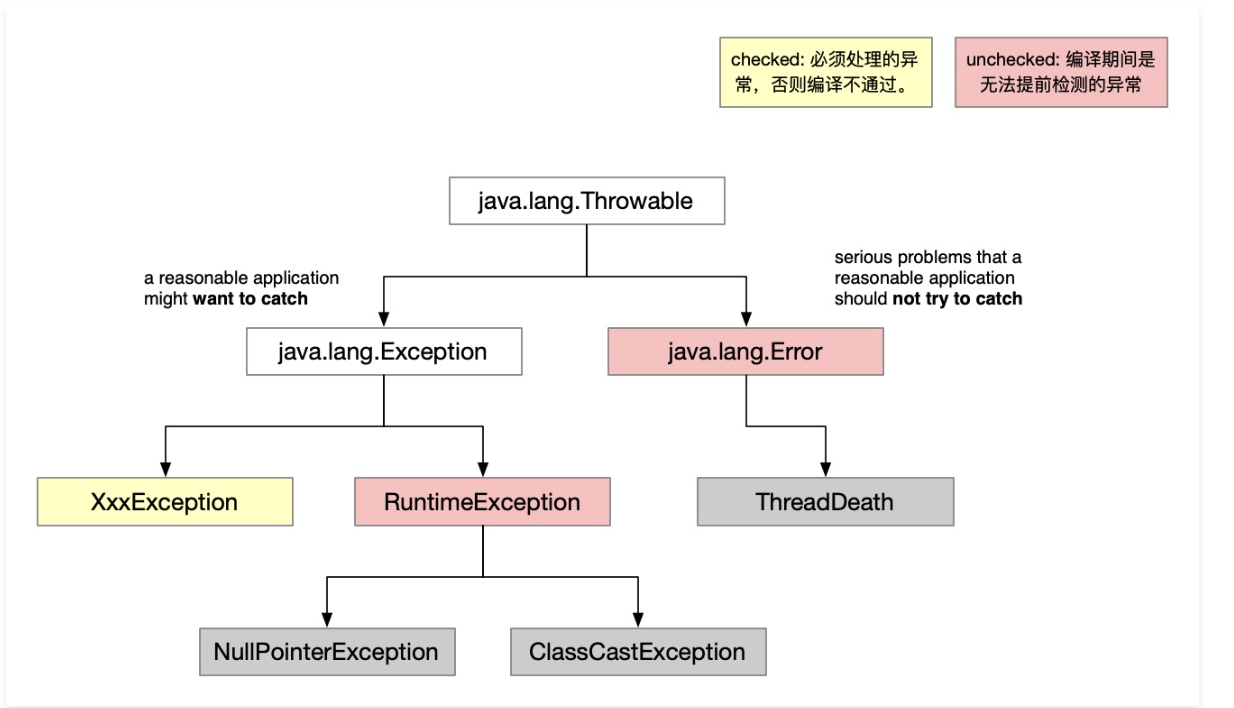

# NoClassDefFoundError vs ClassNotFoundException
---

The **difference depends on who asked the class to be loaded**:

* **`ClassNotFoundException` is thrown when the code is directly trying to load a class**, passing the `String` argument representing a Fully Qualified Name of the class.

    * e.g. `Class.forName(String)`, or `ClassLoader.loadClass(String)`.
    
* **`NoClassDefFoundError` is thrown when the JVM is asked to load a class indirectly**.
    * e.g. when class A is using class B and class B is not on classpath, `NoClassDefFoundError` will be thrown.

https://stackoverflow.com/a/28323277/16317008

e.g., 

在 Intellij IDEA 环境下，会提示这行代码可能会抛出 java.lang.ClassNotFoundException

```java
Class clz = Class.forName("com.itwanger.s41.Demo1");
```

建议你要么使用 try-catch 进行捕获, 

注意打印异常堆栈信息的 `printStackTrace()` 方法，该方法会将异常的堆栈信息打印到标准的控制台下，如果是测试环境，这样的写法还 OK，如果是生产环境，这样的写法是不可取的，**必须使用日志框架把异常的堆栈信息输出到日志系统中**，否则可能没办法跟踪。：
```java
try {
    Class clz = Class.forName("com.itwanger.s41.Demo1");
} catch (ClassNotFoundException e) {
    e.printStackTrace();
}
```

要么在方法签名上使用 throws 关键字抛出, 

这样做的好处是不需要对异常进行捕获处理，只需要交给 Java 虚拟机来处理即可；坏处就是没法针对这种情况做相应的处理。

```java
public class Demo1 {
    public static void main(String[] args) throws ClassNotFoundException {
        Class clz = Class.forName("com.itwanger.s41.Demo1");
    }
}
```

# 导致程序抛出异常的原因
---

- 程序在试图打开一个不存在的文件；
- 程序遇到了网络连接问题；
- 用户输入了糟糕的数据；
- 程序在处理算术问题时没有考虑除数为 0 的情况；